In [2]:
import datetime
import time
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

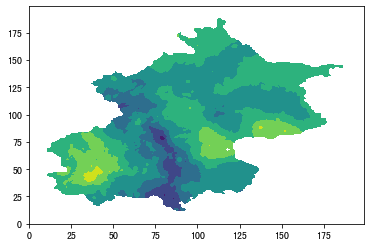

In [12]:
data1 = np.load(r"D:\Python\radar_data\Deal_awsData\train_data\difference\201607201310.npy")
data1.shape
plt.contourf(data1)
plt.show()

In [13]:
grid = np.load(r"D:\Python\radar_data\Deal_awsData\read_station_data\aws_idw\radar_beijing.npy")[::, 400:600, 300:500]
grid[1].shape

(200, 200)

In [14]:
# 计算每个站的坐标
grid_zero = np.zeros_like(grid[0].shape)
np.hstack((grid[0][0][0],grid[1][0][0]))

array([115.30890103,  39.35310215])

In [56]:
grid_arr = []
for i in range(grid.shape[1]):
    tem_list = []
    for j in range(grid.shape[1]):
        tem_list.append(np.hstack((grid[0][i][j],grid[1][i][j])).tolist())
    grid_arr.append(tem_list)
np.save("./grid_point.npy",grid_arr)

In [57]:
grid_arr = np.array(grid_arr)
grid_arr[0,0,:]

array([115.30890103,  39.35310215])

In [17]:
np.max(grid[0]),np.min(grid[0]),np.max(grid[1]),np.min(grid[1])


(117.65392718469407, 115.27802898792577, 41.148395888067036, 39.35310215002268)

In [33]:
data = pd.read_csv(r"D:\Python\radar_data\Deal_awsData\read_station_data\aws_idw\station4.csv")
station_npy = data.values[:,[1,2,4,5]]
# np.save("./station.npy",station_npy)
# # data.values
# # data
# station_npy = np.load(r"./station.npy")
station_npy

array([['A0700', '正阳门', 116.39138999999999, 39.898340000000005],
       ['A1001', '天安门', 116.39056000000001, 39.9],
       ['A1014', '古观象台', 116.42833, 39.90528],
       ...,
       ['A1578', '汉石桥湿地', 116.80888999999999, 40.12472],
       ['A1579', '天竺综保区', 116.57278000000001, 40.1075],
       ['A1580', '绿富农', 116.79778, 40.235279999999996]], dtype=object)

In [31]:
data.head()

,Unnamed: 0,STATIONID,STATIONNAME,PREFECTURE,LONGITUDE,LATITUDE,ALTITUDE,CITY
0,0,A0700,正阳门,东城,116.39139,39.89834,40.0,1
1,1,A1001,天安门,东城,116.39056,39.90000,52.0,1
2,2,A1014,古观象台,东城,116.42833,39.90528,48.0,1
3,3,A1016,天坛,东城,116.40472,39.88444,47.0,1
4,4,A1030,龙潭湖,东城,116.42778,39.87306,44.0,1


In [19]:
point = [station_npy[0][1],station_npy[0][2]]
point

[116.3914, 39.8983]

In [58]:
# 计算每一点的坐标
data = pd.read_csv(r"D:\Python\radar_data\Deal_awsData\read_station_data\aws_idw\station4.csv")
station_npy = data.values[:,[1,4,5,2]]
# station_npy
point_dict = {}
for s in station_npy:
    point = [s[1],s[2],s[3]]
    point_sum = []
    for i in range(200):
        temp_list = []
        for j in range(200):
            grid_point = grid_arr[i,j,:]
            temp_list.append(np.around(np.sum(np.abs(point - grid_point)),decimals=5))
        point_sum.append(temp_list)
    #         point_sum[i,j] = np.sum(point - grid_point)
    point_sum = np.asarray(point_sum)
    index = np.unravel_index(np.abs(point_sum).argmin(),point_sum.shape)
    point_dict[s[0]] = index

In [59]:
# 保存点的坐标
point_dict
with open("./points.txt","w") as f:
    f.write(str(point_dict))

In [64]:
# 求出最小值的索引
print(np.min(point_sum))
index = np.unravel_index(np.abs(point_sum).argmin(),point_sum.shape)
index

0.00849


(98, 128)

In [62]:
data1[98,128]

0.8954877620153496

In [61]:
np.abs([-0.123456789,0.147824655])

array([0.12345679, 0.14782465])

In [65]:
point_dict

{'A0700': (60, 93),
 'A1001': (60, 93),
 'A1014': (61, 96),
 'A1016': (58, 94),
 'A1030': (57, 96),
 'A1076': (62, 93),
 '54514': (56, 81),
 'A1010': (56, 86),
 'A1021': (50, 84),
 'A1022': (58, 74),
 'A1023': (52, 94),
 'A1035': (51, 89),
 'A1037': (50, 73),
 'A1046': (54, 89),
 'A1047': (55, 93),
 'A1053': (57, 83),
 'A1066': (55, 69),
 'A1067': (57, 66),
 'A1070': (54, 78),
 'A1078': (57, 76),
 'A1095': (50, 90),
 'A1104': (49, 66),
 'A1143': (54, 67),
 'A1147': (48, 76),
 '54511': (49, 100),
 '54594': (40, 90),
 'A1251': (29, 115),
 'A1252': (18, 87),
 'A1253': (37, 103),
 'A1254': (27, 87),
 'A1255': (29, 103),
 'A1256': (38, 108),
 'A1257': (45, 97),
 'A1258': (30, 95),
 'A1259': (20, 95),
 'A1260': (48, 88),
 'A1261': (34, 81),
 'A1265': (11, 89),
 'A1266': (21, 88),
 'A1267': (26, 80),
 'A1268': (50, 97),
 'A1270': (42, 81),
 'A1272': (34, 108),
 'A1273': (38, 86),
 'A1274': (45, 99),
 '54416': (114, 133),
 '54421': (144, 154),
 'A1651': (131, 155),
 'A1652': (134, 142),
 'A165

In [ ]:
id_list = ['A0700', 'A1001', 'A1014', 'A1016', 'A1030', 'A1076', '54514', 'A1010', 'A1021', 'A1022', 'A1023', 'A1035', 'A1037', 'A1046', 'A1047', 'A1053', 'A1066', 'A1067', 'A1070', 'A1078', 'A1095', 'A1104', 'A1143', 'A1147', '54511', '54594', 'A1251', 'A1252', 'A1253', 'A1254', 'A1255', 'A1256', 'A1257', 'A1258', 'A1259', 'A1260', 'A1261', 'A1265', 'A1266', 'A1267', 'A1268', 'A1270', 'A1272', 'A1273', 'A1274', '54416', '54421', 'A1651', 'A1652', 'A1653', 'A1654', 'A1655', 'A1656', 'A1657', 'A1658', 'A1659', 'A1660', 'A1661', 'A1662', 'A1663', 'A1664', 'A1665', 'A1666', 'A1667', 'A1669', 'A1670', 'A1671', 'A1672', 'A1674', 'A1675', 'A1676', 'A1677', 'A1678', 'A1683', 'A1684', 'A1685', 'A1686', 'A1687', 'A1688', 'A1689', 'A1690', 'A1691', 'A1692', 'A1693', 'A1695', 'A1700', '54424', 'A1501', 'A1502', 'A1503', 'A1504', 'A1505', 'A1506', 'A1507', 'A1508', 'A1509', 'A1510', 'A1511', 'A1513', 'A1514', 'A1515', 'A1517', 'A1518', 'A1519', 'A1520', 'A1521', 'A1522', 'A1523', 'A1524', 'A1525', 'A1526', 'A1527', 'A1530', 'A1531', 'A1532', 'A1533', 'A1534', 'A1535', 'A1536', 'A1537', 'A1538', '54406', '54410', 'A0451', 'A0452', 'A0453', 'A0454', 'A0455', 'A0456', 'A0457', 'A0458', 'A0460', 'A0461', 'A1451', 'A1452', 'A1453', 'A1454', 'A1455', 'A1456', 'A1457', 'A1458', 'A1459', 'A1460', 'A1461', 'A1462', 'A1463', 'A1464', 'A1465', 'A1466', 'A1468', 'A1469', 'A1470', 'A1471', 'A1473', 'A1474', 'A1475', 'A1476', 'A1477', 'A1478', 'A1479', 'A1480', 'A1481', 'A1482', 'A1483', 'A1484', 'A1485', 'A1486', 'A1487', 'A1488', 'A1489', 'A1490', 'A1491', 'A1492', 'A1493', 'A1494', 'A1495', 'A1496', 'A1701', 'A1702', 'A1703', 'A1704', 'A1705', 'A1706', 'A1707', 'A1708', 'A1709', 'A1710', 'A1711', 'A1712', 'A1713', '54412', '54419', 'A1601', 'A1602', 'A1603', 'A1604', 'A1605', 'A1606', 'A1607', 'A1608', 'A1609', 'A1610', 'A1617', 'A1618', 'A1619', 'A1620', 'A1621', 'A1622', 'A1623', 'A1626', 'A1627', 'A1628', 'A1629', 'A1630', 'A1631', 'A1632', 'A1633', 'A1634', '54596', '54597', 'A0301', 'A0302', 'A0303', 'A0304', 'A0305', 'A0306', 'A0307', 'A0308', 'A0309', 'A0310', 'A0311', 'A1309', 'A1310', 'A1311', 'A1312', 'A1313', 'A1314', 'A1315', 'A1316', 'A1317', 'A1318', 'A1319', 'A1320', 'A1321', 'A1322', 'A1323', 'A1324', 'A1327', 'A1328', 'A1329', 'A1330', 'A1331', 'A1332', 'A1333', 'A1334', 'A1335', 'A1336', 'A1337', 'A1338', 'A1339', 'A1344', 'A1345', 'A1346', 'A1347', '54499', 'A0405', 'A1401', 'A1402', 'A1403', 'A1404', 'A1405', 'A1406', 'A1407', 'A1408', 'A1409', 'A1410', 'A1411', 'A1415', 'A1416', 'A1417', 'A1418', 'A1419', 'A1421', 'A1422', 'A1423', 'A1424', 'A1425', 'A1426', 'A1427', 'A1428', 'A1429', 'A1430', 'A1431', 'A1432', 'A1433', 'A1434', 'A1435', 'A1437', 'A1438', 'A1441', 'A1442', 'A1443', 'A1444', 'A1445', 'A1447', 'A1448', 'A1449', 'A1450', '54433', 'A1003', 'A1007', 'A1008', 'A1009', 'A1017', 'A1018', 'A1038', 'A1039', 'A1040', 'A1041', 'A1042', 'A1048', 'A1052', 'A1072', 'A1073', 'A1085', 'A1086', 'A1087', 'A1088', 'A1089', 'A1090', 'A1091', 'A1092', 'A1093', 'A1094', 'A1110', 'A1111', 'A1112', 'A1113', 'A1114', 'A1115', 'A1116', 'A1117', 'A1118', 'A1119', 'A1120', 'A1121', 'A1122', 'A1123', 'A1124', 'A1125', 'A1126', 'A1127', 'A1128', 'A1129', 'A1130', 'A1131', 'A1132', 'A1133', 'A1134', 'A1135', 'A1136', 'A1137', 'A1138', 'A1139', 'A1140', 'A1141', 'A1142', '54399', 'A1013', 'A1024', 'A1029', 'A1032', 'A1033', 'A1034', 'A1045', 'A1050', 'A1051', 'A1054', 'A1061', 'A1065', 'A1068', 'A1069', 'A1074', 'A1146', '54513', 'A1019', 'A1031', 'A1036', 'A1043', 'A1079', 'A1080', 'A1081', 'A1102', 'A1103', 'A1105', 'A1106', 'A1107', 'A1108', 'A1109', 'A0705', 'A0706', 'A0707', 'A1006', 'A1015', 'A1020', 'A1049', 'A1060', 'A1098', 'A1100', 'A1101', '54431', 'A1201', 'A1202', 'A1203', 'A1204', 'A1205', 'A1208', 'A1209', 'A1212', 'A1213', 'A1214', 'A1215', 'A1218', 'A1219', 'A1221', 'A1222', 'A1223', 'A1224', 'A1225', 'A1226', 'A1227', 'A1228', 'A1229', 'A1230', 'A1231', 'A1232', 'A1233', 'A1234', 'A1235', 'A1236', 'A1237', 'A1238', 'A1239', 'A1240', 'A1241', 'A1242', 'A1243', 'A1244', 'A1245', 'A1246', 'A1247', 'A1248', 'A1249', '54501', '54505', 'A0351', 'A0352', 'A0353', 'A0354', 'A0355', 'A0356', 'A0357', 'A0358', 'A1351', 'A1352', 'A1353', 'A1355', 'A1356', 'A1357', 'A1358', 'A1359', 'A1360', 'A1361', 'A1362', 'A1363', 'A1364', 'A1365', 'A1366', 'A1367', 'A1368', 'A1369', 'A1370', 'A1371', 'A1372', 'A1373', 'A1374', 'A1375', 'A1376', 'A1377', 'A1378', 'A1379', 'A1380', 'A1381', 'A1382', 'A1383', 'A1384', 'A1385', 'A1386', 'A1387', 'A1388', 'A1389', 'A1390', 'A1391', 'A1392', 'A1393', 'A1394', 'A1395', 'A1396', 'A1397', 'A1398', 'A1399', 'A1400', '54398', 'A1551', 'A1552', 'A1553', 'A1554', 'A1555', 'A1556', 'A1557', 'A1558', 'A1559', 'A1560', 'A1561', 'A1562', 'A1563', 'A1568', 'A1569', 'A1570', 'A1571', 'A1572', 'A1573', 'A1574', 'A1575', 'A1578', 'A1579', 'A1580']


In [151]:
# 收集数据
fromtime = "201607201310"
endtime = "201607201800"
from_time = datetime.datetime.strptime(fromtime, '%Y%m%d%H%M')
end_time = datetime.datetime.strptime(endtime, '%Y%m%d%H%M')
periods = int((end_time - from_time).total_seconds() / 300) + 1
# print(periods)
timeindex5m = [datetime.datetime.strftime(i, '%Y%m%d%H%M') for i in
                   pd.date_range(fromtime, periods=periods, freq="300s")]

feature_name = ['temperature','humidity','presure','difference']
data_path = r"D:\Python\radar_data\Deal_awsData\train_data"
data_all = {}
for feature in feature_name:
    data_all[feature] = np.load(os.path.join(data_path,feature,f'{timeindex5m[0]}.npy'))

In [ ]:
temperature = np.load(os.path.join(data_path,"temperature",f'{timeindex5m[0]}.npy'))
humitidy = np.load(os.path.join(data_path,"humidity",f'{timeindex5m[0]}.npy'))
presure = np.load(os.path.join(data_path,'presure',f'{timeindex5m[0]}.npy'))
difference = np.load(os.path.join(data_path,'difference',f'{timeindex5m[0]}.npy'))


In [102]:
for feature in feature_name:
#     data_dict = {}
    data_list = []
    for k,v in point_dict.items():
#         data_dict[k] = data_all[feature][v]
        data_list.append(data_all[feature][v])
    data_series = pd.Series(data_list)
    if feature == "temperature":
        data_df = pd.DataFrame(data_series,columns=[feature])
    else:
        data_df = pd.concat([data_df,pd.DataFrame(data_series,columns = [feature])],join="outer",axis=1)
data_df

,temperature,humidity,presure,difference
0,0.025342,0.082037,-0.111729,-4.938818
1,0.025342,0.082037,-0.111729,-4.938818
2,0.070307,0.073057,-0.317192,-3.230043
3,0.138480,0.000000,-0.520067,-6.366530
4,0.184164,0.000000,-0.458129,-4.075097
5,0.132516,0.596071,-0.373422,-6.496552
6,-0.123257,0.000000,-1.069239,-13.064897
7,0.139128,0.314066,-0.608643,-11.861416
8,0.060586,0.000000,-0.543314,-12.426768
9,-0.002917,0.086701,-1.134982,-3.568330


In [25]:
# 收集数据
with open("./points.txt") as f:
    point_dict = eval(f.read())
fromtime = "201607201310"
endtime = "201607312355"
from_time = datetime.datetime.strptime(fromtime, '%Y%m%d%H%M')
end_time = datetime.datetime.strptime(endtime, '%Y%m%d%H%M')
periods = int((end_time - from_time).total_seconds() / 300) + 1
# print(periods)
timeindex5m = [datetime.datetime.strftime(i, '%Y%m%d%H%M') for i in
                   pd.date_range(fromtime, periods=periods, freq="300s")]

feature_name = ['temperature','humidity','presure','difference']
data_path = r"D:\Python\radar_data\Deal_awsData\train_data"

flag = False
for timestamp in timeindex5m:
    if not (os.path.exists(os.path.join(data_path,"temperature",f'{timestamp}.npy')) and os.path.exists(os.path.join(data_path,"humidity",f'{timestamp}.npy')) and 
           os.path.exists(os.path.join(data_path,"presure",f'{timestamp}.npy')) and os.path.exists(os.path.join(data_path,"difference",f'{timestamp}.npy'))):
        continue
    for feature in feature_name:
        data_list = []
        for k,v in point_dict.items():
            data_list.append(np.load(os.path.join(data_path,feature,f'{timestamp}.npy'))[v])
        data_series = pd.Series(data_list)
        if feature == "temperature":
            data_df = pd.DataFrame(data_series,columns=[feature])
        else:
            data_df = pd.concat([data_df,pd.DataFrame(data_series,columns = [feature])],axis=1)
    if not flag:
        data_frame = data_df
        flag = True
    else:
        data_frame = pd.concat([data_frame,data_df],axis=0,ignore_index=True)
data_frame.to_csv("./aws_train_data.csv",index=None)        
data_frame

,temperature,humidity,presure,difference
0,0.025336,0.082020,-0.111706,-4.860325
1,0.025336,0.082020,-0.111706,-4.860325
2,0.070316,0.073042,-0.317213,-3.191097
3,0.138466,0.000000,-0.520252,-6.363686
4,0.184156,0.000000,-0.458108,-4.022568
5,0.132510,0.596049,-0.373398,-6.488822
6,-0.123262,0.000000,-1.069238,-13.070061
7,0.139129,0.314065,-0.608643,-11.833212
8,0.060586,0.000000,-0.543315,-12.424427
9,-0.002957,0.086751,-1.134946,-3.573388


In [121]:
data_frame.to_csv("./aws_train_data.csv",index=None)

In [87]:
data_series = pd.Series(data_dict)
data_series
# data_df = pd.DataFrame(data_dict,columns=['temperature','humidity','presure','difference'])
# data_df

A0700    [0.02534223732368183, 0.08203681417664697, -0....
A1001    [0.02534223732368183, 0.08203681417664697, -0....
A1014    [0.0703073966913867, 0.07305667897650082, -0.3...
A1016    [0.13847962958151566, 0.0, -0.5200671160725661...
A1030    [0.1841636112179214, 0.0, -0.45812916314986896...
A1076    [0.13251611724796378, 0.5960706165266731, -0.3...
54514    [-0.12325670793973066, 0.0, -1.069238550978671...
A1010    [0.13912761142529706, 0.3140664206443615, -0.6...
A1021    [0.06058569417013698, 0.0, -0.5433136906204282...
A1022    [-0.002916676404594981, 0.0867007718337, -1.13...
A1023    [0.2782496151526702, 0.0, -0.44499592588582143...
A1035    [0.2680632194548929, 0.021987063545896433, -0....
A1037    [-0.19600883856930962, 0.0, -0.667938280347024...
A1046    [0.2135274368203846, 0.05162894568421919, -0.1...
A1047    [0.3775347084366315, 0.058195237047050735, -0....
A1053    [0.044579076779640785, 0.0, -0.629099095295950...
A1066    [-0.0007532221195179888, 0.3279981505188546, -.

In [148]:
arr1 = np.random.randint(0,10,(12,537))
arr2 = np.random.randint(0,10,(12,537))
arr3 = np.random.randint(0,10,(12,537))

In [147]:
arr1

array([[8, 2, 9, ..., 5, 1, 1],
       [1, 5, 1, ..., 8, 8, 6],
       [6, 4, 5, ..., 9, 1, 8],
       ...,
       [0, 2, 7, ..., 4, 9, 1],
       [9, 5, 3, ..., 5, 2, 8],
       [6, 5, 7, ..., 1, 1, 0]])

In [139]:
arr1.T

array([[8, 1, 6, ..., 0, 9, 6],
       [2, 5, 4, ..., 2, 5, 5],
       [9, 1, 5, ..., 7, 3, 7],
       ...,
       [5, 8, 9, ..., 4, 5, 1],
       [1, 8, 1, ..., 9, 2, 1],
       [1, 6, 8, ..., 1, 8, 0]])

In [140]:
arr2.T

array([[7, 7, 7, ..., 2, 8, 3],
       [9, 2, 9, ..., 8, 3, 4],
       [3, 7, 7, ..., 5, 6, 3],
       ...,
       [6, 7, 9, ..., 1, 8, 7],
       [1, 9, 7, ..., 8, 2, 8],
       [3, 9, 7, ..., 5, 8, 5]])

In [149]:
data = np.hstack([arr1.T,arr2.T,arr3.T])

In [150]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0,1,6,7,6,8,1,2,8,2,...,0,9,0,8,4,8,7,1,9,2
1,1,6,2,9,5,2,5,6,5,9,...,7,7,4,9,8,5,0,9,0,1
2,6,3,9,2,5,9,3,8,9,2,...,7,5,8,9,2,0,9,8,5,8
3,8,9,2,2,9,2,2,3,2,7,...,3,9,6,3,7,2,2,3,1,4
4,1,8,5,3,6,9,0,4,5,3,...,8,2,0,9,0,0,9,6,3,6
5,0,7,8,1,9,9,7,0,5,6,...,2,7,5,3,5,6,3,1,2,1
6,7,8,5,2,2,0,7,1,0,5,...,5,0,8,8,2,3,1,6,7,6
7,4,8,9,8,6,5,9,5,1,2,...,1,8,0,0,8,4,0,2,0,0
8,1,7,8,7,9,2,3,1,0,4,...,6,4,2,5,1,6,6,4,7,0
9,1,1,9,5,4,6,4,7,3,4,...,1,2,9,9,3,8,7,9,6,6


In [27]:
# 收集数据
with open("./points.txt") as f:
    point_dict = eval(f.read())
fromtime = "201607201310"
endtime = "201607312355"
from_time = datetime.datetime.strptime(fromtime, '%Y%m%d%H%M')
end_time = datetime.datetime.strptime(endtime, '%Y%m%d%H%M')
periods = int((end_time - from_time).total_seconds() / 300) + 1
# print(periods)
timeindex5m = [datetime.datetime.strftime(i, '%Y%m%d%H%M') for i in
                   pd.date_range(fromtime, periods=periods, freq="300s")]

feature_name = ['temperature','humidity','presure','difference']
data_path = r"D:\Python\radar_data\Deal_awsData\train_data"

flag = False
for timestamp in timeindex5m:
    data_list = []
    for k,v in point_dict.items():
        try:
            data_list.append(np.load(os.path.join(data_path,"difference",f'{timestamp}.npy'))[v])
        except:
            pass
    data_series = pd.Series(data_list)
    data_df = pd.DataFrame(data_series,columns=[feature])
    if not flag:
        data_frame = data_df
        flag = True
    else:
        data_frame = pd.concat([data_frame,data_df],axis=0,ignore_index=True)
# data_frame.to_csv("./aws_train_data.csv",index=None)        
# data_frame

data_diff = data_frame[['difference']]
data_diff

,difference
0,-4.860325
1,-4.860325
2,-3.191097
3,-6.363686
4,-4.022568
5,-6.488822
6,-13.070061
7,-11.833212
8,-12.424427
9,-3.573388


In [28]:
fromtime = "201607201310"
endtime = "201607312355"
from_time = datetime.datetime.strptime(fromtime, '%Y%m%d%H%M')
end_time = datetime.datetime.strptime(endtime, '%Y%m%d%H%M')
periods = int((end_time - from_time).total_seconds() / 300) + 1
# print(periods)
timeindex5m = [datetime.datetime.strftime(i, '%Y%m%d%H%M') for i in
                   pd.date_range(fromtime, periods=periods, freq="300s")]

data_path = r"D:\Python\radar_data\Deal_awsData\train_data\data_csv"

flag = False
for timestamp in timeindex5m:
    if not (os.path.exists(os.path.join(data_path,f'{timestamp}.csv'))):
            continue
    data_csv = pd.read_csv(os.path.join(data_path,f'{timestamp}.csv'))
    if not flag:
        data_all = data_csv
        flag = True
    else:
        data_all = pd.concat([data_all,data_csv],axis=0,ignore_index=True)
data_all

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.7,3.1,2.1,1.9,2.3,NaN,NaN,0.8,0.9,1.5,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2,2.8,2.9,1.8,1.4,2.0,1.9,1.2,0.7,0.9,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.3,3.3,3.0,2.0,2.6,1.9,1.0,0.8,1.5,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.8,2.1,1.7,1.9,1.1,0.7,1.1,1.6,1.3,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.9,4.1,3.2,1.8,1.7,2.3,3.0,1.4,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,3.9,2.7,2.0,2.3,2.9,2.2,2.0,2.4,2.3,2.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2.9,2.5,1.9,4.5,2.7,NaN,NaN,2.6,2.4,1.4,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
8,3.7,2.5,2.1,2.5,2.1,NaN,NaN,1.7,1.9,3.1,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
9,1.6,2.3,3.0,2.4,1.6,1.6,1.5,1.4,1.3,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
# data_all.to_csv("./aws_train.csv",index=None)

In [29]:
data_all = pd.concat([data_all,data_diff],axis=1)
data_all

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,difference
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.860325
1,3.7,3.1,2.1,1.9,2.3,NaN,NaN,0.8,0.9,1.5,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,-4.860325
2,2.8,2.9,1.8,1.4,2.0,1.9,1.2,0.7,0.9,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.191097
3,4.3,3.3,3.0,2.0,2.6,1.9,1.0,0.8,1.5,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.363686
4,2.8,2.1,1.7,1.9,1.1,0.7,1.1,1.6,1.3,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.022568
5,3.9,4.1,3.2,1.8,1.7,2.3,3.0,1.4,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-6.488822
6,3.9,2.7,2.0,2.3,2.9,2.2,2.0,2.4,2.3,2.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.070061
7,2.9,2.5,1.9,4.5,2.7,NaN,NaN,2.6,2.4,1.4,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,-11.833212
8,3.7,2.5,2.1,2.5,2.1,NaN,NaN,1.7,1.9,3.1,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,-12.424427
9,1.6,2.3,3.0,2.4,1.6,1.6,1.5,1.4,1.3,1.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.573388


In [30]:
data_all.to_csv("./aws_train.csv",index=None)

In [14]:
ar = np.random.randint(1,10,(8,9))
ar

array([[8, 7, 2, 9, 8, 5, 4, 2, 5],
       [6, 6, 8, 3, 2, 4, 3, 1, 9],
       [3, 6, 8, 7, 1, 1, 5, 1, 1],
       [6, 4, 5, 4, 8, 9, 9, 5, 3],
       [9, 1, 6, 2, 4, 5, 1, 2, 8],
       [9, 3, 1, 6, 1, 4, 4, 3, 8],
       [6, 8, 4, 4, 5, 6, 9, 9, 9],
       [6, 9, 1, 3, 5, 3, 4, 3, 8]])

In [15]:
import numpy as np
import pandas as pd
df = pd.DataFrame(ar)
df.iloc[5,5] = np.nan
df

,0,1,2,3,4,5,6,7,8
0,8,7,2,9,8,5.0,4,2,5
1,6,6,8,3,2,4.0,3,1,9
2,3,6,8,7,1,1.0,5,1,1
3,6,4,5,4,8,9.0,9,5,3
4,9,1,6,2,4,5.0,1,2,8
5,9,3,1,6,1,NaN,4,3,8
6,6,8,4,4,5,6.0,9,9,9
7,6,9,1,3,5,3.0,4,3,8


In [19]:
df.fillna(method='ffill',axis=1)

,0,1,2,3,4,5,6,7,8
0,8.0,7.0,2.0,9.0,8.0,5.0,4.0,2.0,5.0
1,6.0,6.0,8.0,3.0,2.0,4.0,3.0,1.0,9.0
2,3.0,6.0,8.0,7.0,1.0,1.0,5.0,1.0,1.0
3,6.0,4.0,5.0,4.0,8.0,9.0,9.0,5.0,3.0
4,9.0,1.0,6.0,2.0,4.0,5.0,1.0,2.0,8.0
5,9.0,3.0,1.0,6.0,1.0,1.0,4.0,3.0,8.0
6,6.0,8.0,4.0,4.0,5.0,6.0,9.0,9.0,9.0
7,6.0,9.0,1.0,3.0,5.0,3.0,4.0,3.0,8.0


In [172]:
df["d"] = range(8)
np.array(range(8)).shape

(8,)

In [181]:
x = int("00")
rain_l = []
for i in range(13):
    rain_l.append("%.2d"%x)
    x += 5
    if x >= 60:
        x -= 60
rain_l

['00', '05', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '00']

In [ ]:
# 收集数据
with open("./points.txt") as f:
    point_dict = eval(f.read())
fromtime = "201607201310"
endtime = "201607312355"
from_time = datetime.datetime.strptime(fromtime, '%Y%m%d%H%M')
end_time = datetime.datetime.strptime(endtime, '%Y%m%d%H%M')
periods = int((end_time - from_time).total_seconds() / 300) + 1
# print(periods)
timeindex5m = [datetime.datetime.strftime(i, '%Y%m%d%H%M') for i in
                   pd.date_range(fromtime, periods=periods, freq="300s")]

data_path = r"D:\Python\radar_data\Deal_awsData\train_data"

flag1 = False
for timestamp in timeindex5m:
    if not (os.path.exists(os.path.join(data_path,f'{timestamp}.csv'))):
            continue
    data_csv = pd.read_csv(os.path.join(data_path,f'{timestamp}.csv'))
    if not flag2:
        data_all = data_csv
        flag2 = True
    else:
        data_all = pd.concat([data_all,data_csv],axis=0,ignore_index=True)
    data_list = []
    for k,v in point_dict.items():
        try:
            data_list.append(np.load(os.path.join(data_path,"difference",f'{timestamp}.npy'))[v])
        except:
            pass
    data_series = pd.Series(data_list)
    data_df = pd.DataFrame(data_series,columns=['difference'])
    if not flag1:
        data_frame = data_df
        flag1 = True
    else:
        data_frame = pd.concat([data_frame,data_df],axis=0,ignore_index=True)
# data_frame.to_csv("./aws_train_data.csv",index=None)        
# data_frame

data_diff = data_frame[['difference']]
data_diff


data_path = r"D:\Python\radar_data\Deal_awsData\train_data\data_csv"

flag2 = False
for timestamp in timeindex5m:
    if not (os.path.exists(os.path.join(data_path,f'{timestamp}.csv'))):
            continue
    data_csv = pd.read_csv(os.path.join(data_path,f'{timestamp}.csv'))
    if not flag2:
        data_all = data_csv
        flag2 = True
    else:
        data_all = pd.concat([data_all,data_csv],axis=0,ignore_index=True)
data_all
data_all = pd.concat([data_all,data_diff],axis=1)

In [2]:
import pandas as pd
diff_df = pd.read_csv(r"D:\Python\radar_data\Deal_awsData\train_data\aws_train.csv")
diff_df.head()

,difference,difference_real
0,0.852391,-1.163103
1,-0.282617,-1.163103
2,0.175586,-4.143898
3,1.577714,-0.674134
4,-1.178003,0.203153


In [16]:
diff_arr = diff_df.values
diff_arr

array([[ 0.85239095, -1.16310255],
       [-0.28261663, -1.16310255],
       [ 0.17558582, -4.14389766],
       ...,
       [ 0.85239095, -1.76264902],
       [ 0.85239095, -0.10046282],
       [ 0.85239095, -4.3800403 ]])

In [17]:
import numpy as np
diff_arr = np.where(diff_arr < 0,-1,diff_arr)
diff_arr = np.where(diff_arr == 0,0,diff_arr)
diff_arr = np.where(diff_arr >0,1,diff_arr)
diff_arr

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


array([[ 1., -1.],
       [-1., -1.],
       [ 1., -1.],
       ...,
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.]])

In [9]:
diff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86994 entries, 0 to 86993
Data columns (total 2 columns):
difference         86994 non-null float64
difference_real    83111 non-null float64
dtypes: float64(2)
memory usage: 1.3 MB


In [18]:
diff_tf = pd.DataFrame(diff_arr,columns=diff_df.columns)
diff_tf.dropna(inplace = True)
diff_tf.head()

,difference,difference_real
0,1.0,-1.0
1,-1.0,-1.0
2,1.0,-1.0
3,1.0,-1.0
4,-1.0,1.0


In [19]:
diff_arr.shape

(86994, 2)

In [27]:
diff_same = diff_arr[:,0] * diff_arr[:,1]
diff_same.shape

(86994,)

In [28]:
diff_same = np.where(diff_same == 0,0,1)
np.sum(diff_same)

0.9202588684277077